In [3]:
import pandas as pd
import time

print("Loading data file now")
start = time.time()
df = pd.read_csv('Hotel_Reviews.csv')
end = time.time()

print("Loading took " + str(round(end - start, 2)) + " seconds")

Loading data file now
Loading took 2.6 seconds


In [4]:
df.shape

(515738, 17)

In [5]:
nationality_freq = df["Reviewer_Nationality"].value_counts()
nationality_freq

Reviewer_Nationality
United Kingdom               245246
United States of America      35437
Australia                     21686
Ireland                       14827
United Arab Emirates          10235
                              ...  
Cape Verde                        1
Northern Mariana Islands          1
Tuvalu                            1
Guinea                            1
Palau                             1
Name: count, Length: 227, dtype: int64

In [6]:
print(nationality_freq[1:11].to_string())

Reviewer_Nationality
United States of America     35437
Australia                    21686
Ireland                      14827
United Arab Emirates         10235
Saudi Arabia                  8951
Netherlands                   8772
Switzerland                   8678
Germany                       7941
Canada                        7894
France                        7296


In [7]:
for nat in nationality_freq[:10].index:
   nat_df = df[df["Reviewer_Nationality"] == nat]   
   freq = nat_df["Hotel_Name"].value_counts()
   print("The most reviewed hotel for " + str(nat).strip() + " was " + str(freq.index[0]) + " with " + str(freq[0]) + " reviews.") 
   

C:\Users\waran\AppData\Local\Temp\ipykernel_19492\244245855.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The most reviewed hotel for " + str(nat).strip() + " was " + str(freq.index[0]) + " with " + str(freq[0]) + " reviews.")
C:\Users\waran\AppData\Local\Temp\ipykernel_19492\244245855.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The most reviewed hotel for " + str(nat).strip() + " was " + str(freq.index[0]) + " with " + str(freq[0]) + " reviews.")
C:\Users\waran\AppData\Local\Temp\ipykernel_19492\244245855.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In

The most reviewed hotel for United Kingdom was Britannia International Hotel Canary Wharf with 3833 reviews.
The most reviewed hotel for United States of America was Hotel Esther a with 423 reviews.
The most reviewed hotel for Australia was Park Plaza Westminster Bridge London with 167 reviews.
The most reviewed hotel for Ireland was Copthorne Tara Hotel London Kensington with 239 reviews.
The most reviewed hotel for United Arab Emirates was Millennium Hotel London Knightsbridge with 129 reviews.
The most reviewed hotel for Saudi Arabia was The Cumberland A Guoman Hotel with 142 reviews.
The most reviewed hotel for Netherlands was Jaz Amsterdam with 97 reviews.
The most reviewed hotel for Switzerland was Hotel Da Vinci with 97 reviews.
The most reviewed hotel for Germany was Hotel Da Vinci with 86 reviews.
The most reviewed hotel for Canada was St James Court A Taj Hotel London with 61 reviews.


C:\Users\waran\AppData\Local\Temp\ipykernel_19492\244245855.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The most reviewed hotel for " + str(nat).strip() + " was " + str(freq.index[0]) + " with " + str(freq[0]) + " reviews.")
C:\Users\waran\AppData\Local\Temp\ipykernel_19492\244245855.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The most reviewed hotel for " + str(nat).strip() + " was " + str(freq.index[0]) + " with " + str(freq[0]) + " reviews.")


In [8]:
hotel_freq_df = df.drop(["Hotel_Address", "Additional_Number_of_Scoring", "Review_Date", "Average_Score", "Reviewer_Nationality", "Negative_Review", "Review_Total_Negative_Word_Counts", "Positive_Review", "Review_Total_Positive_Word_Counts", "Total_Number_of_Reviews_Reviewer_Has_Given", "Reviewer_Score", "Tags", "days_since_review", "lat", "lng"], axis = 1)

hotel_freq_df['Total_Reviews_Found'] = hotel_freq_df.groupby('Hotel_Name').transform('count')

hotel_freq_df = hotel_freq_df.drop_duplicates(subset = ["Hotel_Name"])
display(hotel_freq_df) 

,Hotel_Name,Total_Number_of_Reviews,Total_Reviews_Found
0,Hotel Arena,1403,405
405,K K Hotel George,1831,566
971,Apex Temple Court Hotel,2619,1037
2008,The Park Grand London Paddington,4380,1770
3778,Monhotel Lounge SPA,171,35
...,...,...,...
511962,Suite Hotel 900 m zur Oper,3461,439
512401,Hotel Amadeus,717,144
512545,The Berkeley,232,100
512645,Holiday Inn London Kensington,5945,2768


In [9]:
def get_difference_review_avg(row):
  return row["Average_Score"] - row["Calc_Average_Score"]

In [10]:
df['Calc_Average_Score'] = round(df.groupby('Hotel_Name').Reviewer_Score.transform('mean'), 1)


In [11]:
df["Average_Score_Difference"] = df.apply(get_difference_review_avg, axis = 1)


In [12]:
review_scores_df = df.drop_duplicates(subset = ["Hotel_Name"])


In [13]:
review_scores_df = review_scores_df.sort_values(by=["Average_Score_Difference"])

In [14]:
display(review_scores_df[["Average_Score_Difference", "Average_Score", "Calc_Average_Score", "Hotel_Name"]])

,Average_Score_Difference,Average_Score,Calc_Average_Score,Hotel_Name
495945,-0.8,7.7,8.5,Best Western Hotel Astoria
111027,-0.7,8.8,9.5,Hotel Stendhal Place Vend me Paris MGallery by...
43688,-0.7,7.5,8.2,Mercure Paris Porte d Orleans
178253,-0.7,7.9,8.6,Renaissance Paris Vendome Hotel
71274,-0.5,8.9,9.4,Drawing Hotel
...,...,...,...,...
201776,0.7,7.5,6.8,Mercure Paris Op ra Faubourg Montmartre
22189,0.8,7.1,6.3,Holiday Inn Paris Montparnasse Pasteur
250308,0.9,8.6,7.7,MARQUIS Faubourg St Honor Relais Ch teaux
68936,0.9,6.8,5.9,Villa Eugenie


In [15]:
no_negative_reviews = df.apply(lambda x: True if x['Negative_Review'] == "No Negative" else False , axis=1)

no_positive_reviews = df.apply(lambda x: True if x['Positive_Review'] == "No Positive" else False , axis=1)

In [16]:
both_no_reviews = df.apply(lambda x: True if x['Negative_Review'] == "No Negative" and x['Positive_Review'] == "No Positive" else False , axis=1)

In [18]:
def replace_address(row):
    if "Netherlands" in row["Hotel_Address"]:
        return "Amsterdam, Netherlands"
    elif "Barcelona" in row["Hotel_Address"]:
        return "Barcelona, Spain"
    elif "United Kingdom" in row["Hotel_Address"]:
        return "London, United Kingdom"
    elif "Milan" in row["Hotel_Address"]:        
        return "Milan, Italy"
    elif "France" in row["Hotel_Address"]:
        return "Paris, France"
    elif "Vienna" in row["Hotel_Address"]:
        return "Vienna, Austria"
    
df["Hotel_Address"] = df.apply(replace_address, axis = 1)

In [19]:
print(df["Hotel_Address"].value_counts())

Hotel_Address
London, United Kingdom    262301
Barcelona, Spain           60149
Paris, France              59928
Amsterdam, Netherlands     57214
Vienna, Austria            38939
Milan, Italy               37207
Name: count, dtype: int64


In [20]:
display(df.groupby("Hotel_Address").agg({"Hotel_Name": "nunique"}))

,Hotel_Name
Hotel_Address,
"Amsterdam, Netherlands",105
"Barcelona, Spain",211
"London, United Kingdom",400
"Milan, Italy",162
"Paris, France",458
"Vienna, Austria",158


In [21]:
df.drop(["Additional_Number_of_Scoring"], axis = 1, inplace=True)

In [25]:
df.Average_Score = round(df.groupby('Hotel_Name').Reviewer_Score.transform('mean'), 1)

In [26]:
df.Tags = df.Tags.str.strip("[']")
df.Tags = df.Tags.str.replace(" ', '", ",", regex = False)

In [27]:
df["Leisure_trip"] = df.Tags.apply(lambda tag: 1 if "Leisure trip" in tag else 0)
df["Couple"] = df.Tags.apply(lambda tag: 1 if "Couple" in tag else 0)
df["Solo_traveler"] = df.Tags.apply(lambda tag: 1 if "Solo traveler" in tag else 0)
df["Business_trip"] = df.Tags.apply(lambda tag: 1 if "Business trip" in tag else 0)
df["Group"] = df.Tags.apply(lambda tag: 1 if "Group" in tag or "Travelers with friends" in tag else 0)
df["Family_with_young_children"] = df.Tags.apply(lambda tag: 1 if "Family with young children" in tag else 0)
df["Family_with_older_children"] = df.Tags.apply(lambda tag: 1 if "Family with older children" in tag else 0)
df["With_a_pet"] = df.Tags.apply(lambda tag: 1 if "With a pet" in tag else 0)

In [28]:
df.drop(["Review_Total_Negative_Word_Counts", "Review_Total_Positive_Word_Counts", "days_since_review", "Total_Number_of_Reviews_Reviewer_Has_Given"], axis = 1, inplace=True)


In [29]:
print("Saving Hotel_Filtered.csv")
df.to_csv(r'Hotel_Filtered.csv', index = False)

Saving Hotel_Filtered.csv


In [30]:
import time
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

df = pd.read_csv('Hotel_Filtered.csv')

print("Saving Hotel_NLP.csv")
df.to_csv(r'Hotel_NLP.csv', index = False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\waran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saving Hotel_NLP.csv


In [31]:
from nltk.corpus import stopwords

df = pd.read_csv("Hotel_Filtered.csv")

start = time.time()
cache = set(stopwords.words("english"))
def remove_stopwords(review):
    text = " ".join([word for word in review.split() if word not in cache])
    return text

df.Negative_Review = df.Negative_Review.apply(remove_stopwords)   
df.Positive_Review = df.Positive_Review.apply(remove_stopwords)

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader_sentiment = SentimentIntensityAnalyzer()

def calc_sentiment(review):    
    if review == "No Negative" or review == "No Positive":
        return 0
    return vader_sentiment.polarity_scores(review)["compound"]    

In [33]:
df["Negative_Sentiment"] = df.Negative_Review.apply(calc_sentiment)
df["Positive_Sentiment"] = df.Positive_Review.apply(calc_sentiment)

In [34]:
df = df.sort_values(by=["Negative_Sentiment"], ascending=True)
print(df[["Negative_Review", "Negative_Sentiment"]])
df = df.sort_values(by=["Positive_Sentiment"], ascending=True)
print(df[["Positive_Review", "Positive_Sentiment"]])

                                          Negative_Review  Negative_Sentiment
186584  So bad experience memories I hotel The first n...             -0.9920
129503  First charged twice room booked booking second...             -0.9896
307286  The staff Had bad experience even booking Janu...             -0.9889
201953  Everything DO NOT STAY AT THIS HOTEL I never i...             -0.9886
452092  No WLAN room Incredibly rude restaurant staff ...             -0.9884
...                                                   ...                 ...
138365  Wifi terribly slow I speed test network upload...              0.9938
79215   I find anything hotel first I walked past hote...              0.9938
278506  The property great location There bakery next ...              0.9945
339189  Guys I like hotel I wish return next year Howe...              0.9948
480509  I travel lot far visited countless number hote...              0.9957

[515738 rows x 2 columns]
                                     

In [35]:

df = df.reindex(["Hotel_Name", "Hotel_Address", "Total_Number_of_Reviews", "Average_Score", "Reviewer_Score", "Negative_Sentiment", "Positive_Sentiment", "Reviewer_Nationality", "Leisure_trip", "Couple", "Solo_traveler", "Business_trip", "Group", "Family_with_young_children", "Family_with_older_children", "With_a_pet", "Negative_Review", "Positive_Review"], axis=1)

print("Saving  Hotel_NLP.csv")
df.to_csv(r"Hotel_NLP.csv", index = False)

Saving  Hotel_NLP.csv


In [36]:
data = pd.read_csv("Hotel_NLP.csv")

data.head()

,Hotel_Name,Hotel_Address,Total_Number_of_Reviews,Average_Score,Reviewer_Score,Negative_Sentiment,Positive_Sentiment,Reviewer_Nationality,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet,Negative_Review,Positive_Review
0,South Place Hotel,"London, United Kingdom",769,9.3,2.5,-0.9849,-0.9820,Brazil,0,1,0,0,0,0,0,0,No windows claustrophobic place even superior ...,Bathroom Shower We going stay twice hotel 2 ni...
1,Park Plaza County Hall London,"London, United Kingdom",6117,8.4,3.8,-0.9780,-0.9780,Saudi Arabia,1,0,0,0,0,1,0,0,I completely disappointed mad since reception ...,I completely disappointed mad since reception ...
2,Britannia International Hotel Canary Wharf,"London, United Kingdom",9086,6.8,3.3,-0.4767,-0.9751,Australia,1,1,0,0,0,0,0,0,everything terrible,get everything extra internet parking breakfas...
3,Caesar Hotel,"London, United Kingdom",1164,8.3,3.3,0.1082,-0.9721,United States Minor Outlying Islands,1,0,0,0,1,0,0,0,Everything I worst experience ever best friend...,I didnt like anythig Room small Asked upgrade ...
4,Hotel Da Vinci,"Milan, Italy",16670,7.8,2.5,0.0000,-0.9703,United Kingdom,1,0,0,0,0,1,0,0,No Negative,Very rude manager abusive staff reception Dirt...


         Reviewer_Score  Negative_Sentiment  Positive_Sentiment  Leisure_trip  \
cluster                                                                         
0              8.480511            0.019916            0.586224      0.975053   
1              7.975624           -0.005134            0.497069      0.000000   

           Couple  Solo_traveler  Business_trip     Group  \
cluster                                                     
0        0.555634       0.107226       0.000000  0.140188   
1        0.162975       0.717329       0.950362  0.085584   

         Family_with_young_children  Family_with_older_children  With_a_pet  
cluster                                                                      
0                          0.137128                    0.059823    0.002759  
1                          0.025896                    0.008216    0.002555  


C:\Users\waran\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


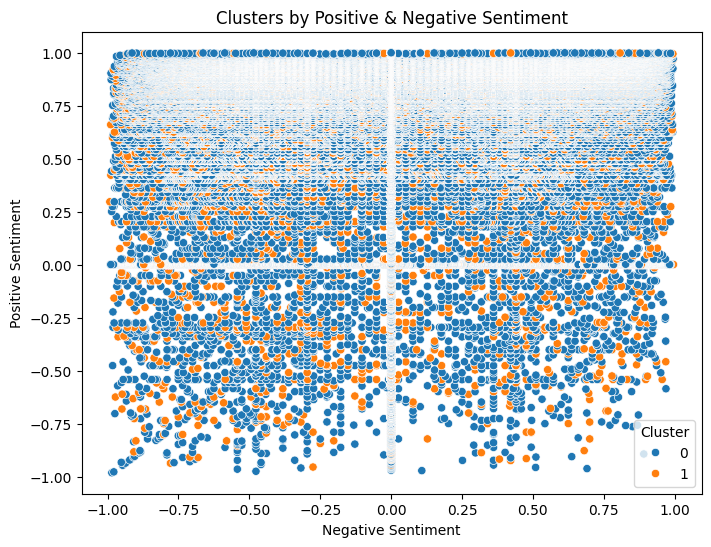


Trip type proportion per cluster:
         Leisure_trip    Couple  Solo_traveler  Business_trip     Group  \
cluster                                                                   
0            0.975053  0.555634       0.107226       0.000000  0.140188   
1            0.000000  0.162975       0.717329       0.950362  0.085584   

         Family_with_young_children  Family_with_older_children  With_a_pet  
cluster                                                                      
0                          0.137128                    0.059823    0.002759  
1                          0.025896                    0.008216    0.002555  


In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Hotel_NLP.csv")  

features = [
    'Reviewer_Score',
    'Negative_Sentiment',
    'Positive_Sentiment',
    'Leisure_trip',
    'Couple',
    'Solo_traveler',
    'Business_trip',
    'Group',
    'Family_with_young_children',
    'Family_with_older_children',
    'With_a_pet'
]

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Negative_Sentiment'],
    y=df['Positive_Sentiment'],
    hue=df['cluster'],
    palette="tab10"
)
plt.title("Clusters by Positive & Negative Sentiment")
plt.xlabel("Negative Sentiment")
plt.ylabel("Positive Sentiment")
plt.legend(title='Cluster')
plt.show()

trip_breakdown = df.groupby('cluster')[[
    'Leisure_trip', 'Couple', 'Solo_traveler', 'Business_trip',
    'Group', 'Family_with_young_children', 'Family_with_older_children', 'With_a_pet'
]].mean()

print("\nTrip type proportion per cluster:")
print(trip_breakdown)


         Reviewer_Score  Negative_Sentiment  Positive_Sentiment  Leisure_trip  \
cluster                                                                         
0              8.538549            0.019362            0.597780      0.975427   
1              7.976189           -0.005089            0.497129      0.000000   
2              8.340790            0.021174            0.558840      0.978557   
3              8.489352            0.019870            0.587508      0.969629   

           Couple  Solo_traveler  Business_trip     Group  \
cluster                                                     
0        1.000000       0.000000        0.00000  0.000000   
1        0.162992       0.717403        0.95046  0.085490   
2        0.000000       0.438814        0.00000  0.000000   
3        0.000000       0.000000        0.00000  0.700935   

         Family_with_young_children  Family_with_older_children  With_a_pet  
cluster                                                             

C:\Users\waran\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


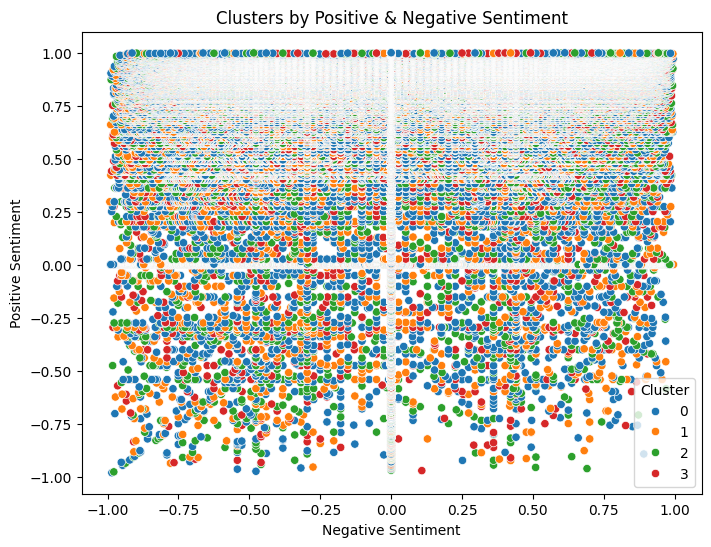


Trip type proportion per cluster:
         Leisure_trip    Couple  Solo_traveler  Business_trip     Group  \
cluster                                                                   
0            0.975427  1.000000       0.000000        0.00000  0.000000   
1            0.000000  0.162992       0.717403        0.95046  0.085490   
2            0.978557  0.000000       0.438814        0.00000  0.000000   
3            0.969629  0.000000       0.000000        0.00000  0.700935   

         Family_with_young_children  Family_with_older_children  With_a_pet  
cluster                                                                      
0                          0.000000                    0.000000    0.002831  
1                          0.025899                    0.008217    0.002556  
2                          0.561186                    0.000000    0.002923  
3                          0.000000                    0.299065    0.002357  


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Hotel_NLP.csv")  

features = [
    'Reviewer_Score',
    'Negative_Sentiment',
    'Positive_Sentiment',
    'Leisure_trip',
    'Couple',
    'Solo_traveler',
    'Business_trip',
    'Group',
    'Family_with_young_children',
    'Family_with_older_children',
    'With_a_pet'
]

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Negative_Sentiment'],
    y=df['Positive_Sentiment'],
    hue=df['cluster'],
    palette="tab10"
)
plt.title("Clusters by Positive & Negative Sentiment")
plt.xlabel("Negative Sentiment")
plt.ylabel("Positive Sentiment")
plt.legend(title='Cluster')
plt.show()

trip_breakdown = df.groupby('cluster')[[
    'Leisure_trip', 'Couple', 'Solo_traveler', 'Business_trip',
    'Group', 'Family_with_young_children', 'Family_with_older_children', 'With_a_pet'
]].mean()

print("\nTrip type proportion per cluster:")
print(trip_breakdown)
